# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

Work shown in GitHub Repo

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('heart_hw.csv')
df.head()

,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0


In [ ]:
#Compute (a) the proportion of people who survive in the control group who do not receive a transplant
control = df[df['transplant'] == 'control']
noTSPSurvive = (control['y']).mean()
print(noTSPSurvive)

#(b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group.
treatment = df[df['transplant'] == 'treatment']
TSPSurvive = (treatment['y']).mean()

difference = TSPSurvive - noTSPSurvive

print(difference)

0.11764705882352941
0.23017902813299232


In [ ]:
# Regress y on transplant using a linear model with a constant.
# How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1?
# Explain the relationship clearly.

df['transplant'] = df['transplant'].replace({'control': 0, 'treatment': 1})

/tmp/ipython-input-2710681781.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['transplant'] = df['transplant'].replace({'control': 0, 'treatment': 1})


In [ ]:
from sklearn.linear_model import LinearRegression

y = df['y']
X = df['transplant'].values.reshape(-1, 1) # Reshape X to be 2D

reg = LinearRegression().fit(X, y)

print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients



0.1176470588235293
[0.23017903]


2. The intercept is equal to the survival rate of the control group and the regression coefficient is equal to the difference in survival rate between the treatment and control groups. By definition, the intercept calculates survival rate for when transplant = 0 or control so it makes sense for these calculations to be equal. $\beta_1$ measures how y changes when transplant changes from 0 to 1 which is equal to the difference between the treatment and control group averages. Thus, the predicted survival rate of the control group is about 11.76% and recieving a transplant increases survial probability by 23.02%.

In [ ]:
# We'd like to include age in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant.
# Regress y on a constant, transplant, and age. How does the intercept change?

vars = ['transplant', 'age']
X = df[vars]

reg2 = LinearRegression().fit(X, y)

print(reg2.intercept_) # Intercept value
print(reg2.coef_) # Regression coefficients

0.7019569721740947
[ 0.26470169 -0.01360722]


3. The intercept increases since it is now factoring in age which is on a different scale than transplant.

In [ ]:
# Build a more flexible model that allows for non-linear age effects and interactions between age and treatment.
# Use a train-test split to validate your model.
# Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not.
# Describe what you see.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X = df[['age']]
y = df['y']
transplant = df['transplant']

X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(
    X, y, transplant, test_size=0.2, random_state=42
)

expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
Z_test = expander.transform(X_test)

names = expander.get_feature_names_out(['age']) # Get the names of these variables

zdf_train = pd.DataFrame(data=Z_train, columns = names, index = X_train.index) # Create a new, expanded dataframe
zdf_test = pd.DataFrame(data=Z_test, columns = names, index = X_test.index) # Create a new, expanded dataframe

zdf_train['transplant'] = t_train
zdf_test['transplant']  = t_test

zdf_train['age:transplant'] = X_train['age'] * t_train
zdf_test['age:transplant']  = X_test['age'] * t_test

In [ ]:
reg3 = LinearRegression().fit(zdf_train, y_train)
y_pred = reg3.predict(zdf_test)


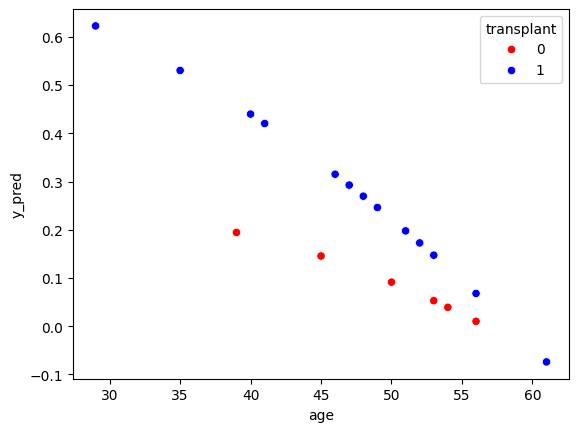

In [ ]:
plot_df = X_test.copy()
plot_df['transplant'] = t_test
plot_df['y_pred'] = y_pred

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=plot_df, x='age', y='y_pred', hue='transplant', palette=['red','blue'])
plt.show()



4. It seems that those who get a transplant have a higher predicted survival rate, but as a persons age increases survival rate decreases, reguardless of receiving a transplant. Futhermore, the deficit of survival rate between those who receive a transplant lessens as age increases, suggesting that old age plays a larger factor into survival rate than a transplant operation.

5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

I think a model like this could be harmful if used to decide who should receive a transplant because it generalizes a person's health. This is extremely risky if it does not account for past medical complications or other personal factors that affect transplant safety. Additionally, such a model might favor younger patients simply because their predicted survival rates are higher, which would be unethical. Selecting candidates based solely on predicted survival ignores individual circumstances and could result in unfair or unsafe decisions. Overall, a model like this will never be 100% accurate so I think these models could be used as a guideline or warning but the decision should never be based fully on it.